# FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Finding the number of rows and columns in the data
df.shape


(1898, 9)

#### Observations: the dataframe has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: order_id, cusomer_id, food_preparation_time, delivery_time have integer datatypes; restaurant_name, cuisine_type, day_of_the_week, rating have object datatypes; cost_of_the_order is a float.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Inspecting Missing Values
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values present in this dataframe


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Checking statistical summary of data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The food preparation time ranges from the minimum 20 minutes to the maximum 35 minutes. The average time it takes for food to get prepared is ~27.37 minutes.


### **Question 5:** How many orders are not rated?

In [ ]:
# Checking how many instances there are for a value "Not given"
df["rating"].value_counts()["Not given"]

736

#### Observations: There are 736 instances of rating being not given


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

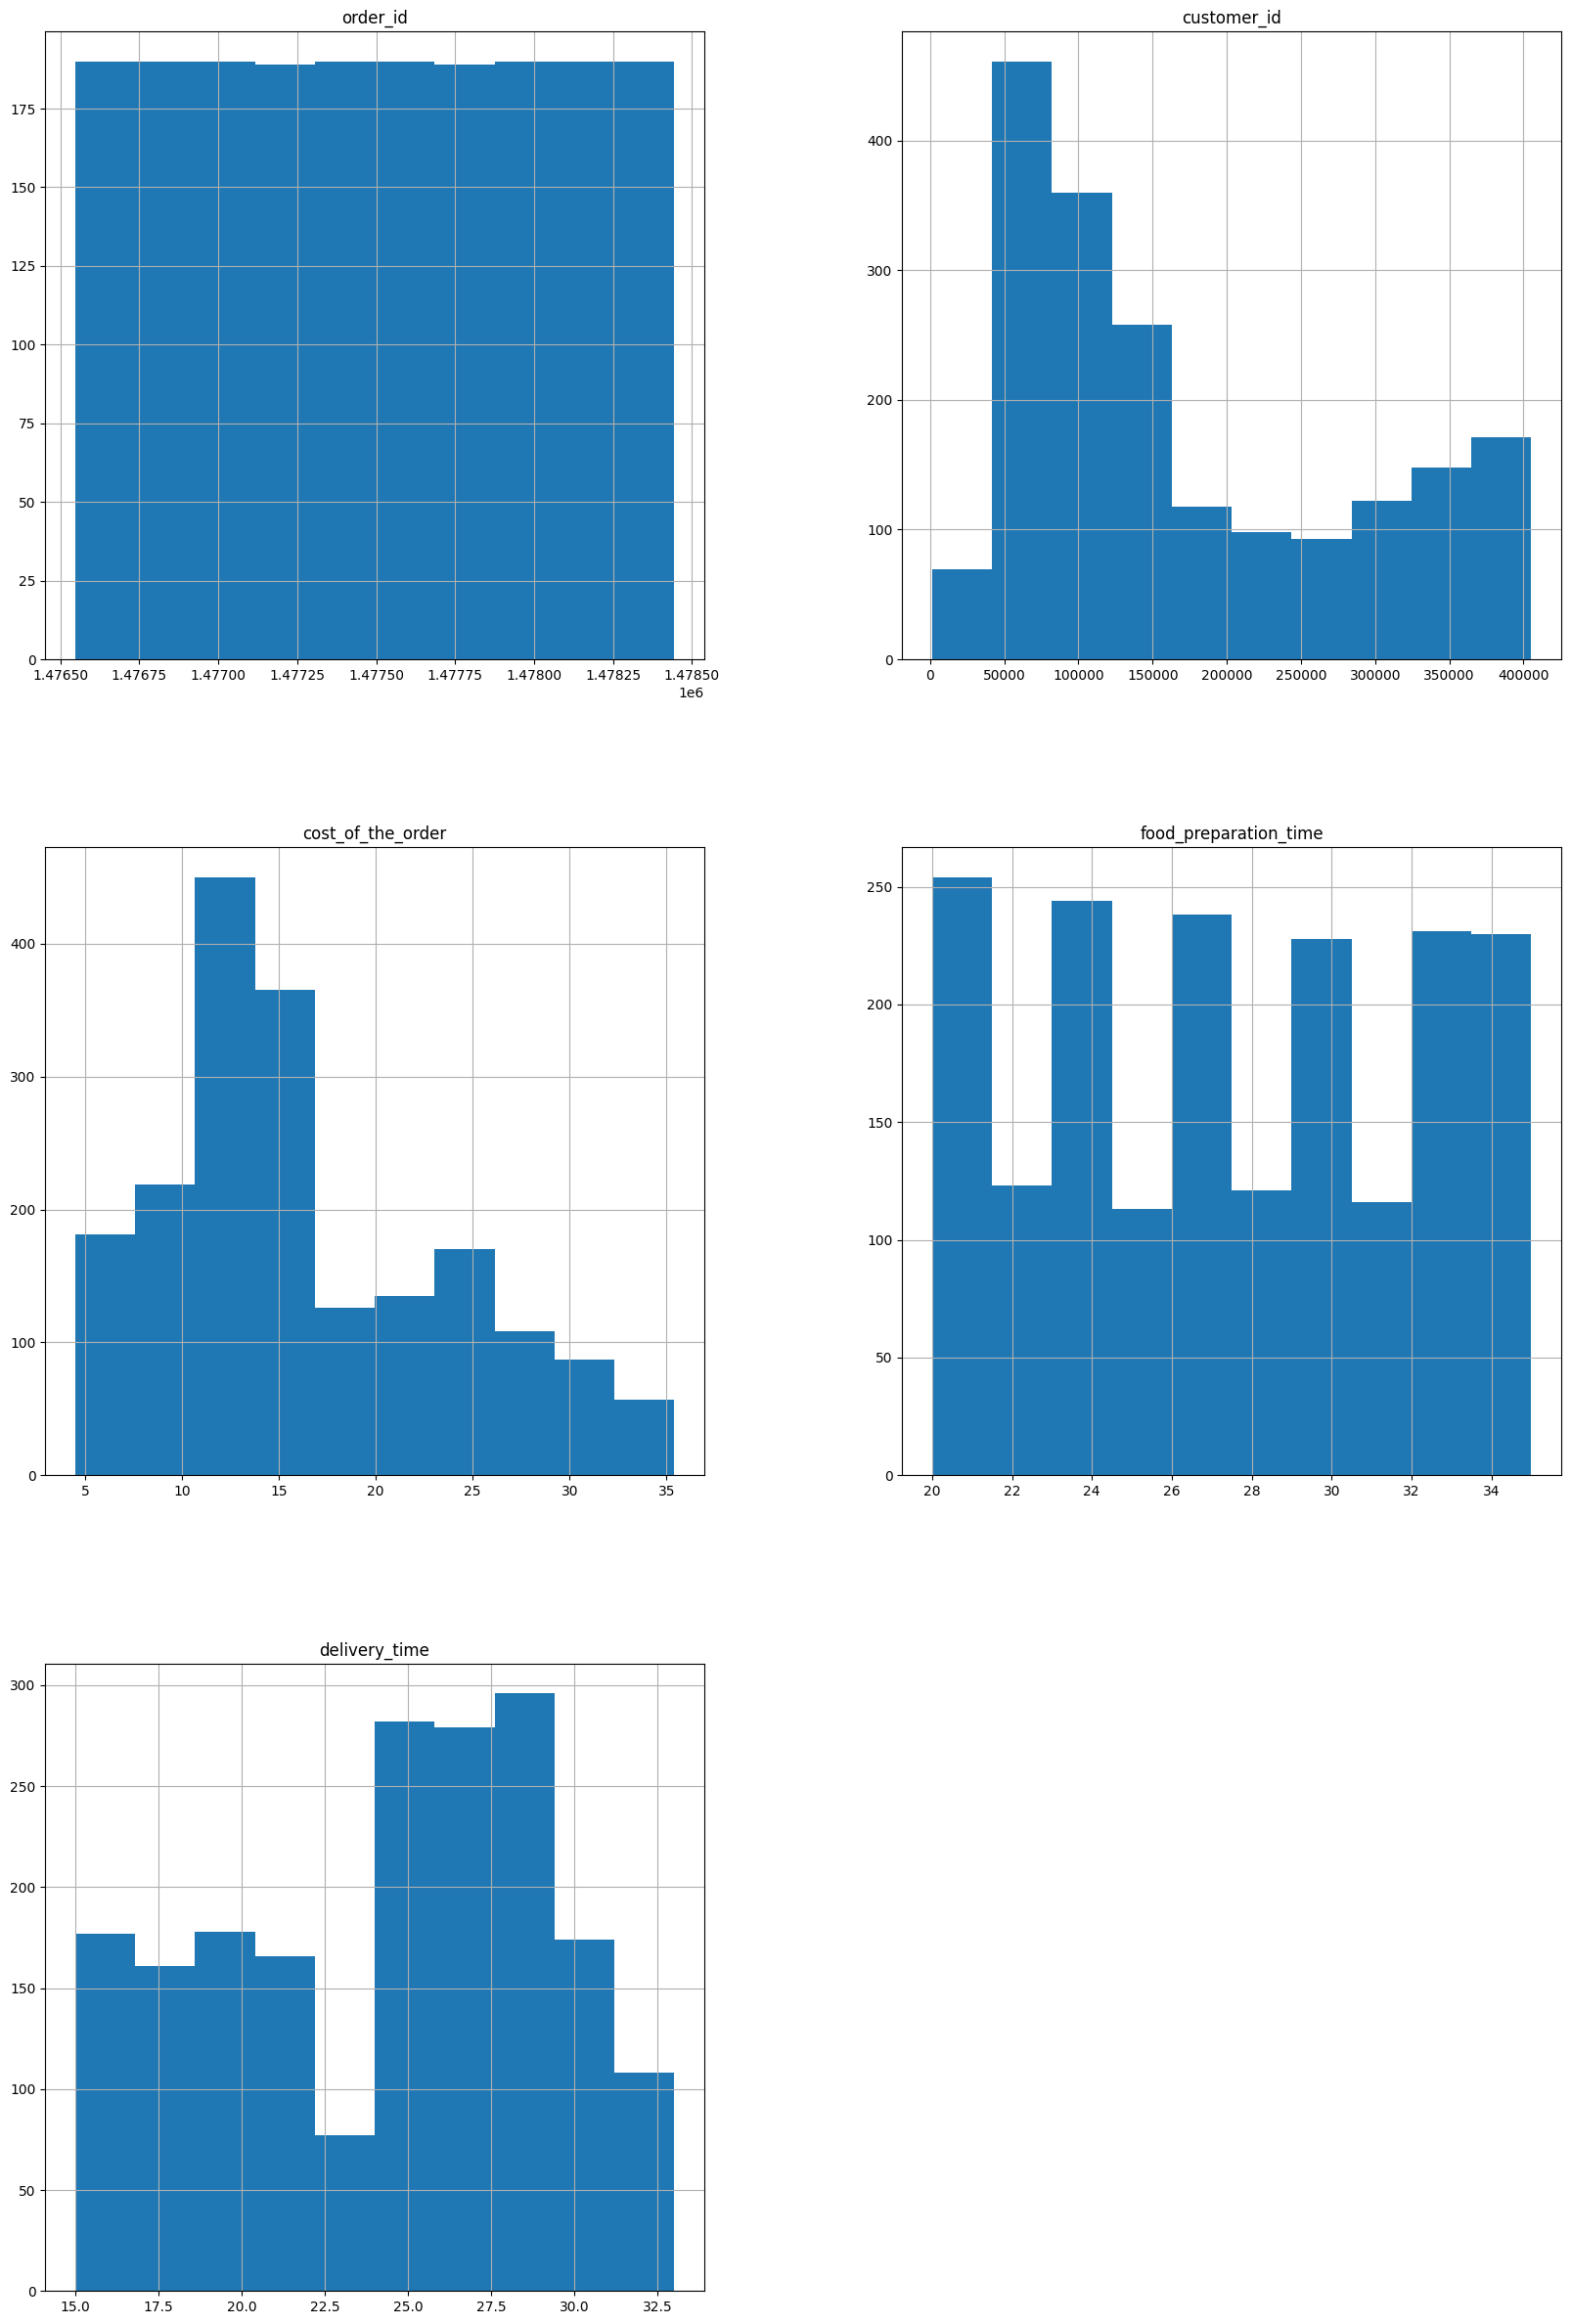

In [ ]:
# pyplot is imported

import matplotlib.pyplot as plt
%matplotlib inline

# For each numeric variable in the dataframe, their distribution is explored via a histogram

numeric_columns = df.select_dtypes(include='number')
numeric_columns.hist(figsize=(20,30))

#### Observation: customer and rating ids are irrelevant as they carry no numeric meaning. Cost of the order has a right-skewed distribution showing that more orders tend to be priced below 20. Food preparation time shows a uniform distribution any time between 20 and 35 minutes is equally likely. Delivery time shows a slightly left-skewed distribution showing that it's more likely the food delivery time will take longer than shorter (most delivery times will be more than 25 minutes).

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


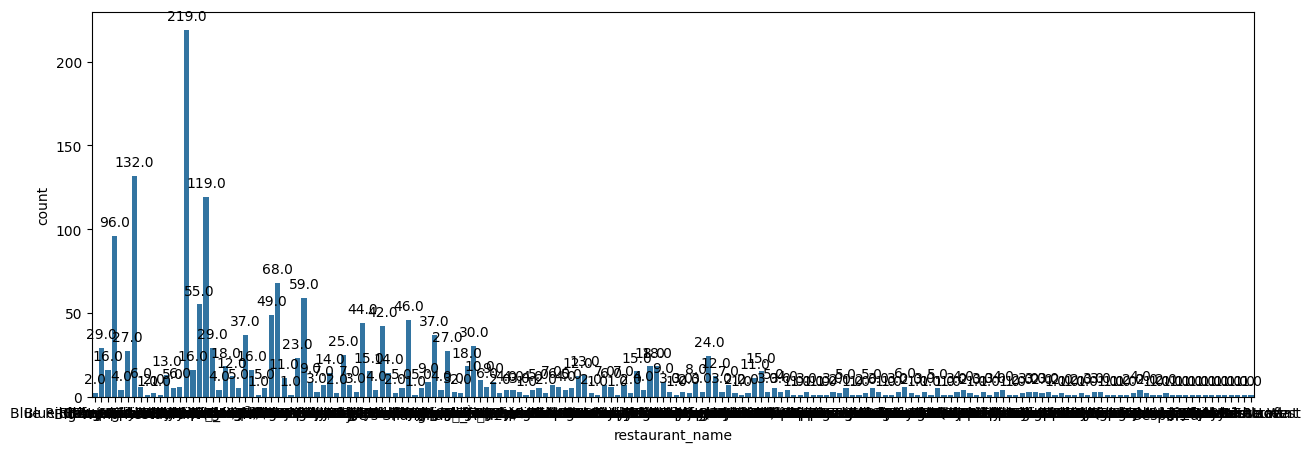

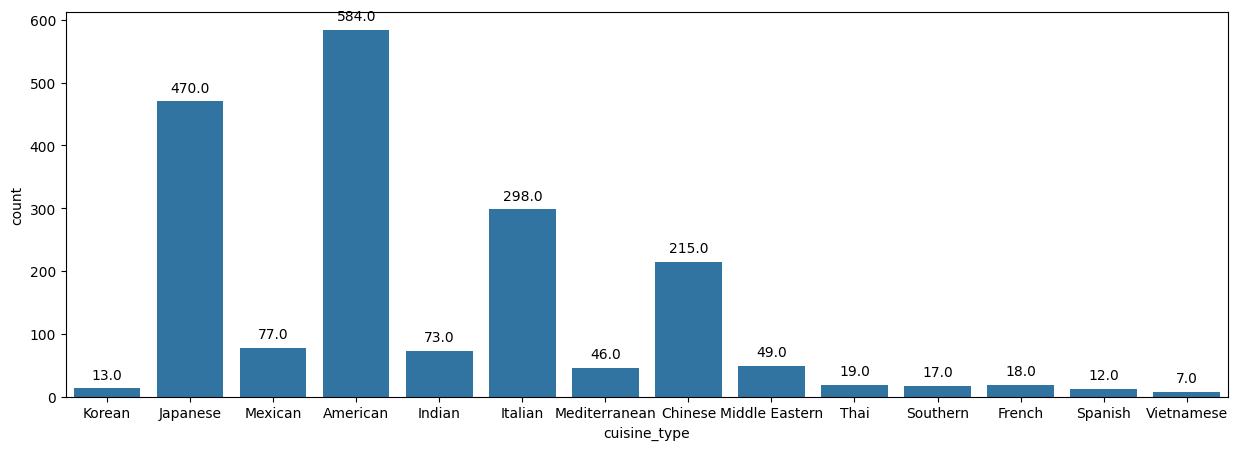

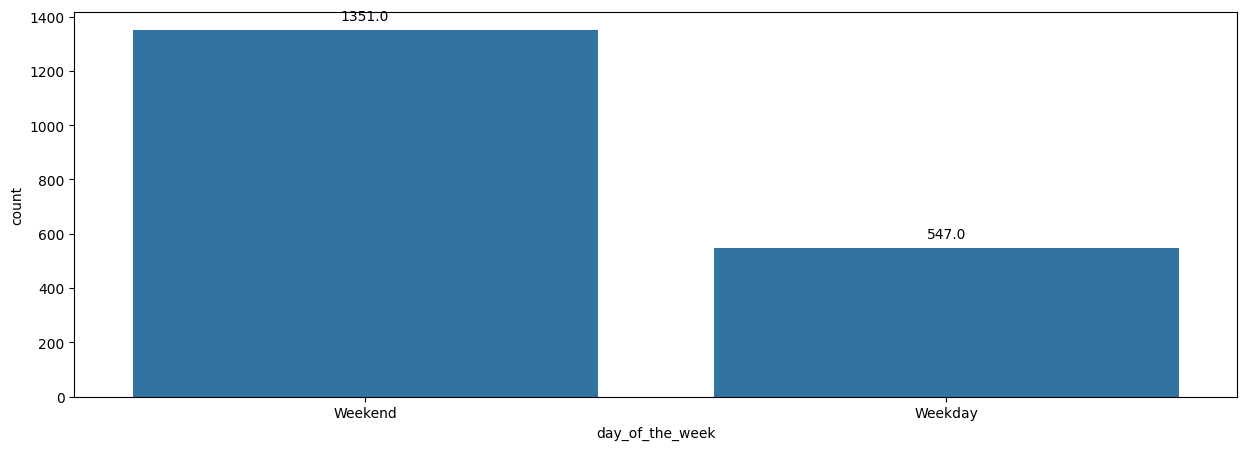

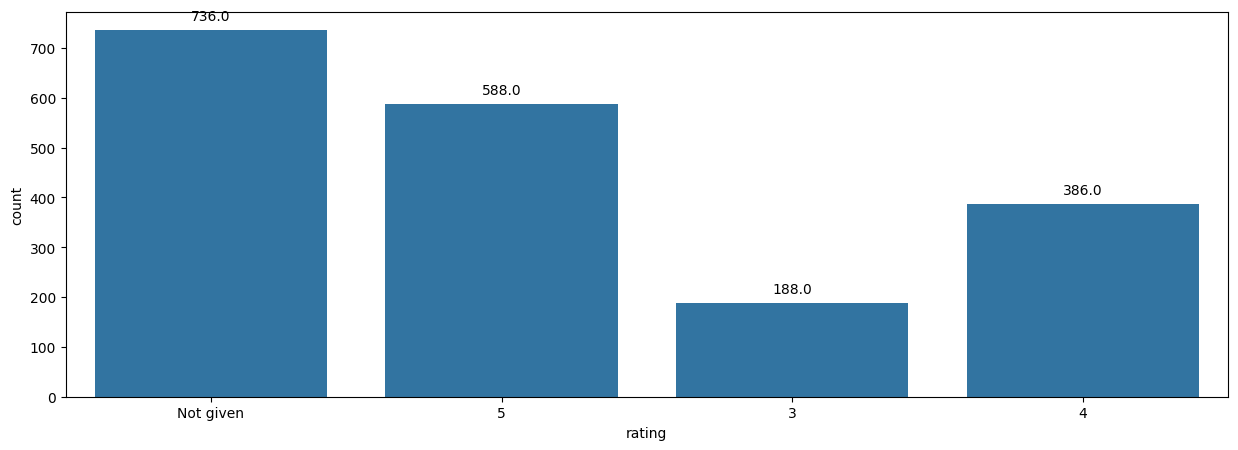

In [ ]:
# For each categorical variable in the dataframe, their distribution is explored via a countplot

# Select only categorical columns
categorical_columns = df.select_dtypes(include='object')

# Plot countplots for each categorical variable
for column in categorical_columns.columns:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=column, data=df)
    # Add annotations (count values)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Observation: restaurant name has too many unique values thus will be explored in the following cell.

Based on the distributionn of values in the cuisine_type column we can see that most people preferred American cusine type with over 550 instances. The least favoured one was Vietnamese with only 7 values.

"day_of_the_week" variable shows that over 50% of customer prefer to order on the weekend rather that the weekday.

Lastly, "rating" variable shows that most customers did not give a rating, while 5 is the most common rating given.



In [ ]:
# exploring the distribution of restaurant names.
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

Observation: "Shake Shack" with over 200 instances was the most popular restaurant to order food from. This is followed by "The Meatball Shop" and "Blue Ribbon Sushi" with over 100 values each.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# repeating the code
# exploring the distribution of restaurant names.
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

Observation: "Shake Shack" with over 200 instances was the most popular restaurant to order food from. This is followed by "The Meatball Shop" and "Blue Ribbon Sushi" with over 100 values each. "Blue Ribbon Fried Chicken" took the 4th place and "Parm" took the 5th place in popularity.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# finding the most popular cuisine on the weekends
df.loc[df["day_of_the_week"] == "Weekend", "cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American cuisine is the most popular cuisine of the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Finding the percentage of orders that cost more than 20 dollars
specific_rows = df.loc[df["cost_of_the_order"]>20].value_counts().sum()


# Calculate the percentage of rows with the specified value out of all rows
percentage = (specific_rows / len(df)) * 100
print(f"Percentage of rows with value over 20: {round(percentage, 2)}%")

Percentage of rows with value over 20: 29.24%


#### Observations: Approximately 29.24% of values cost more than 20.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Finding the mean order delivery time
df["delivery_time"].mean()


24.161749209694417

#### Observations: The mean order delivery time is approximately 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df["customer_id"].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations: Customers with ids "52832", "47440", "83287" were the top 3 buyers, each placing 13,10 and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

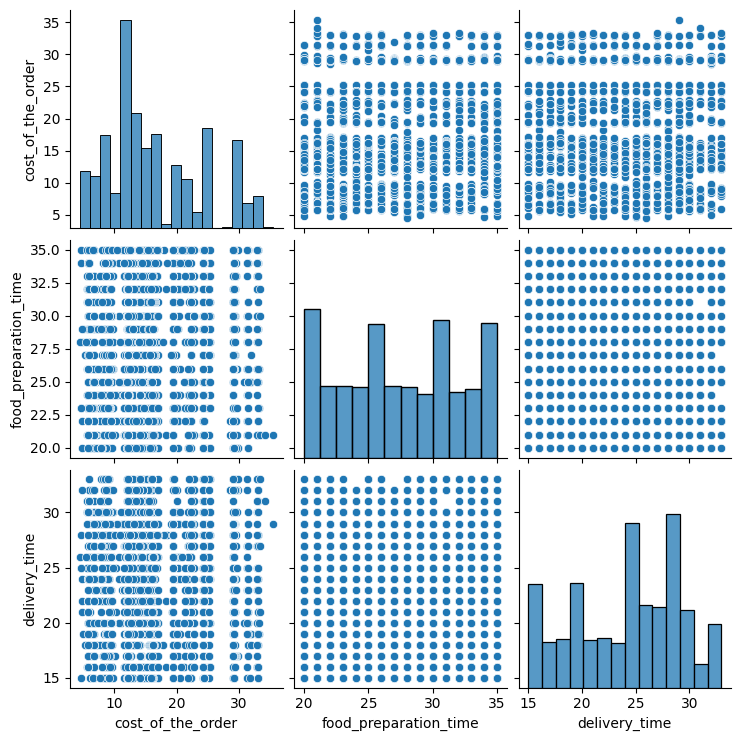

In [ ]:
# plotting scatterplots for important numeric variables
sns.pairplot(df[["cost_of_the_order","food_preparation_time", "delivery_time"]])

Observation: no relationships are visible between numeric variables.

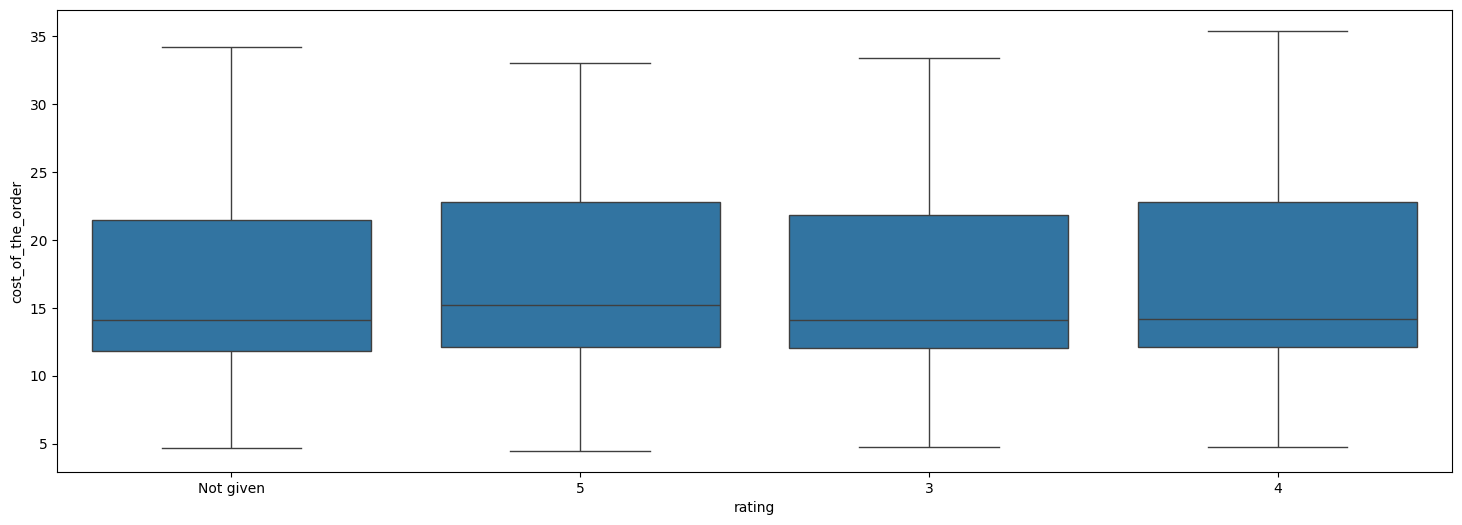

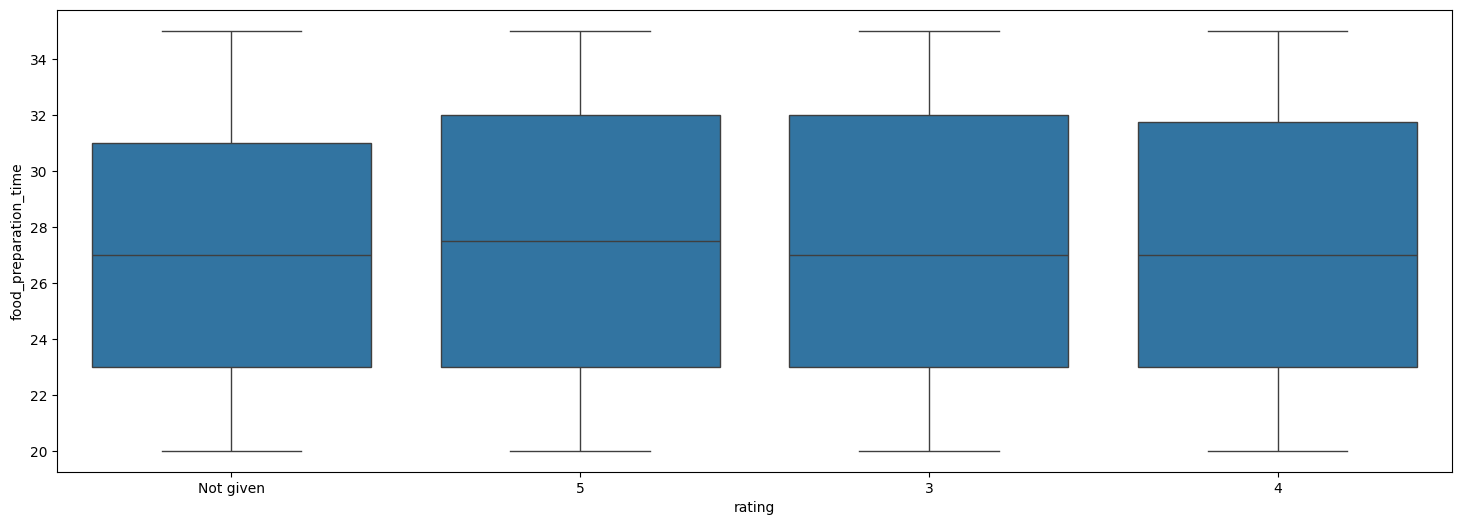

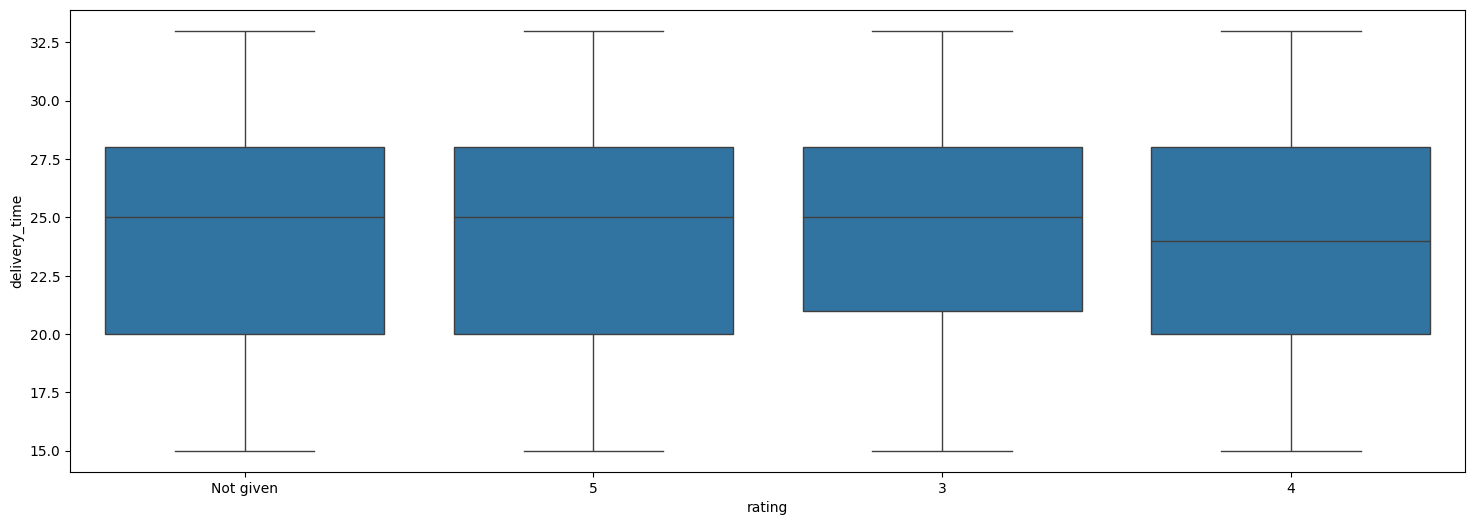

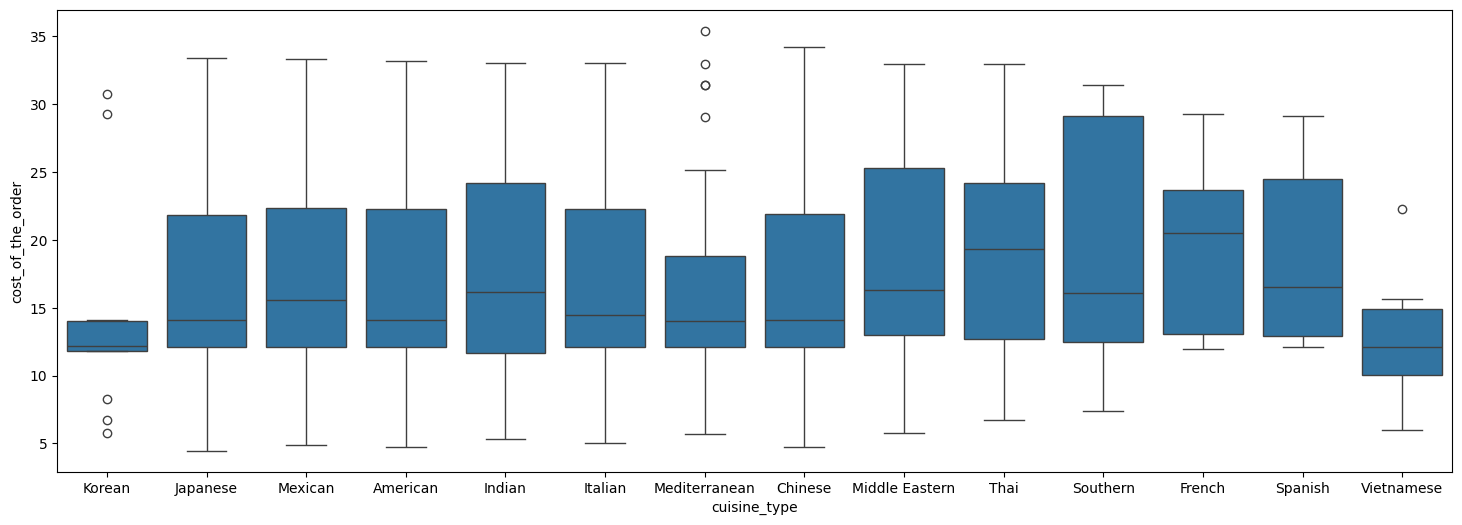

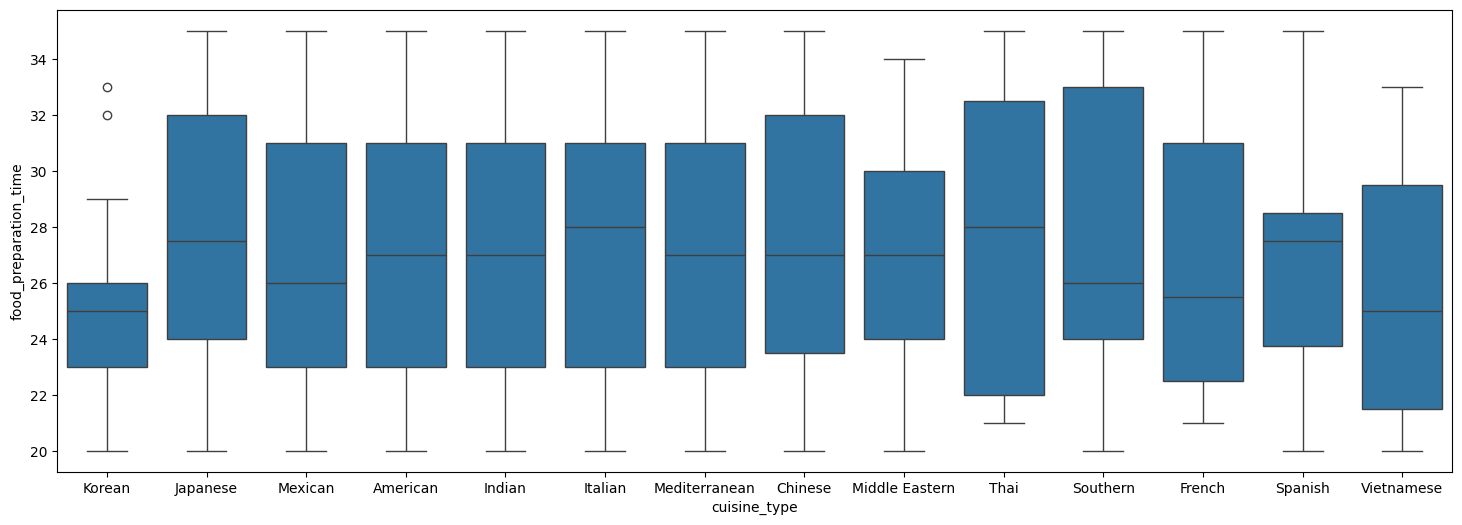

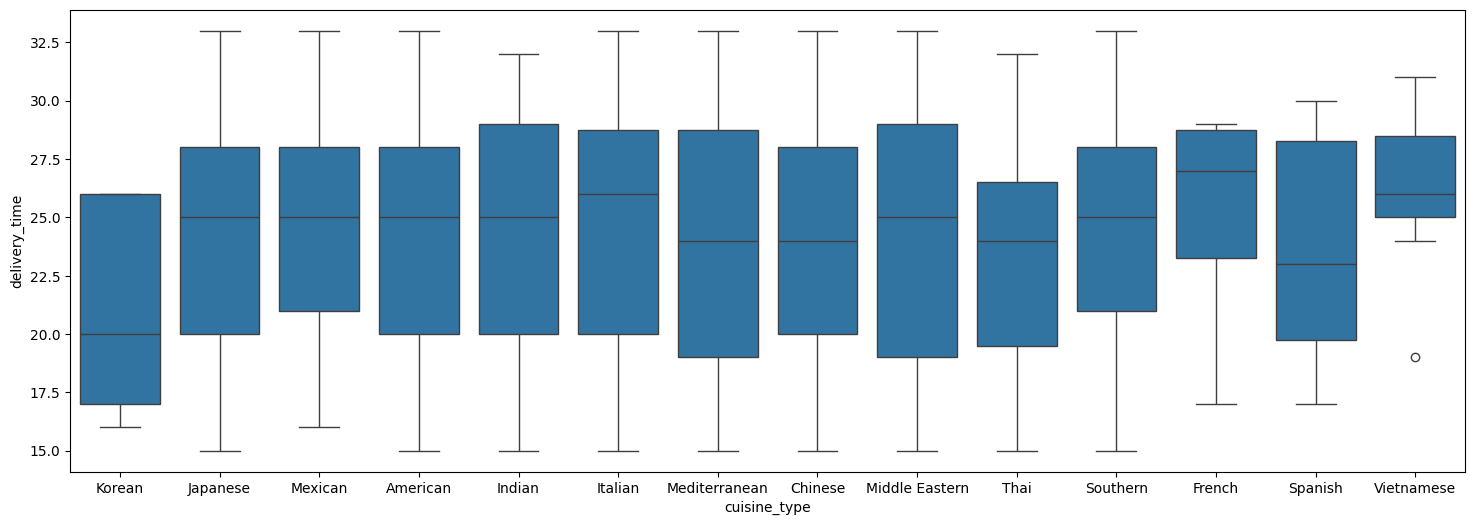

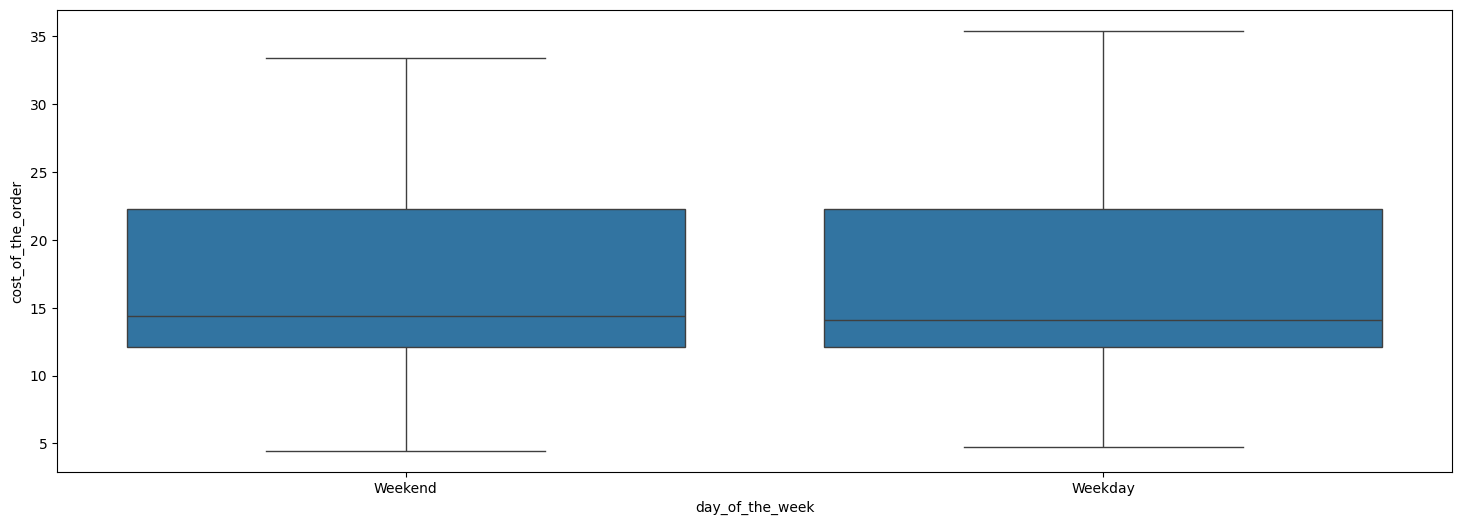

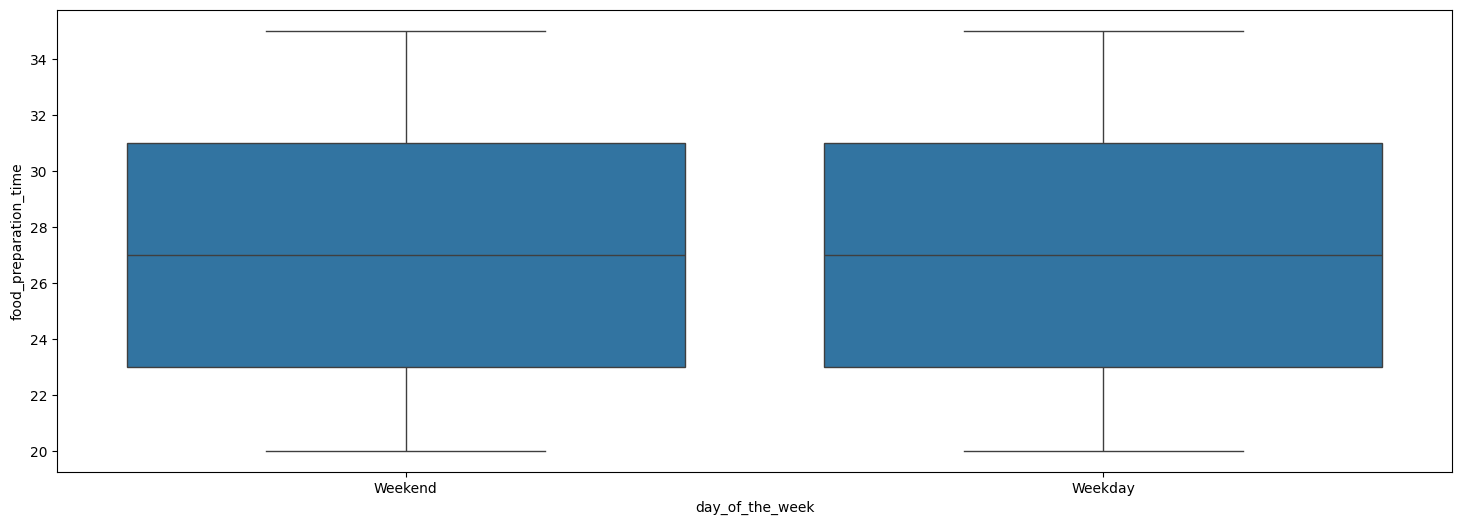

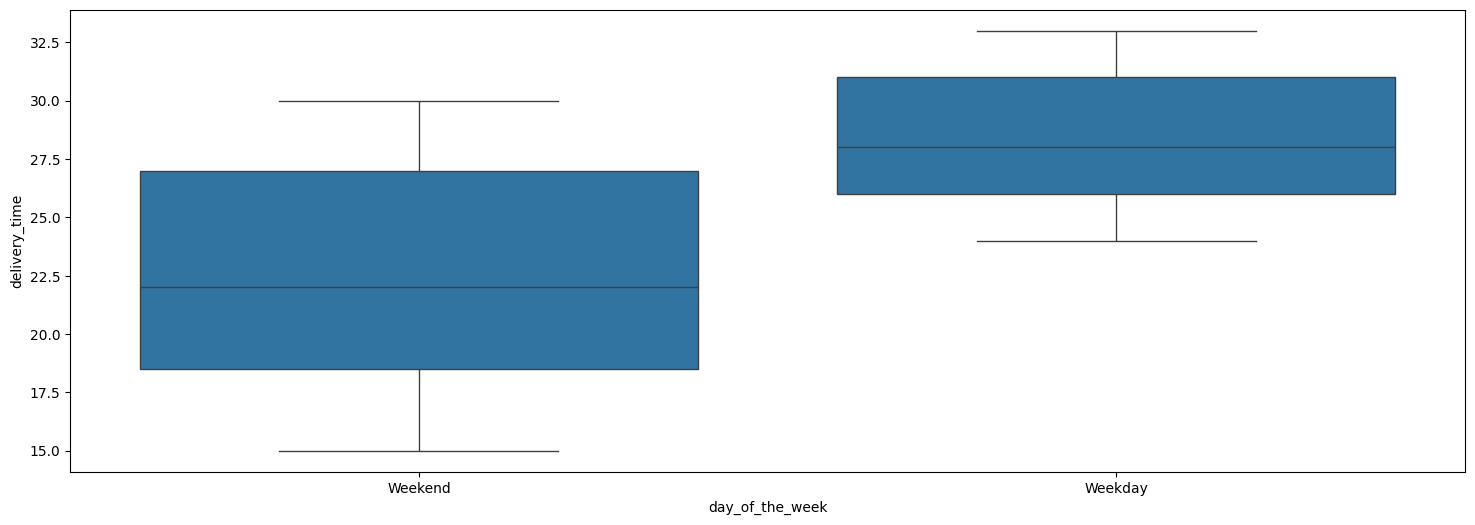

In [ ]:
#exploring relationships for numeric vs categorical variables
for variablex in df[["rating","cuisine_type", "day_of_the_week"]]:
  for variabley in df[["cost_of_the_order","food_preparation_time", "delivery_time"]]:
    plt.figure(figsize=(18, 6))
    # Box Plot
    sns.boxplot(x=variablex, y=variabley, data=df)

Observation: We can observe that all rating restaurants follow a similar distribution for cost, delivery and food preparation times, only the orders that got a 4 star rating tended to have a slightly shorter delivery time on average. Vietnamese and Korean cuisines tend to be significantly cheaper for cost of the order, while French cusines more expense on average (though certain Korean restaurants fall as outliers both on the expensive and cheap side). Interestingly, french cuisine restaurants tend to have a short food preparation time in comparison to other cusines, however, Korean and Vietnamese still take the shortest time to prepare food on average. Thai and Italian cusines take the longest. Korean and Vietnamese also have a lower spread of food prepation values meaning they are more consistent with their timings. Interestingly, Korean cusine retaurants also tend to have the shortest delivery times on average while Vietnamese and French have one of the highest. The day of the week seems to not have an effect on the food preparation time, neither the cost of order. It does, however, take significantly longer to deliver food on the weekday.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# filter restaurants with actual ratings and see their mean rating and count of ratings
df_with_rating = df.loc[df["rating"] != "Not given"]
pivot_table = pd.pivot_table(df_with_rating,
                              values='rating',
                              index='restaurant_name',
                              aggfunc={'rating': ['mean', 'count']})

# Filter the pivot table based on conditions
filtered_pivot_table = pivot_table[(pivot_table['count'] > 50) & (pivot_table['mean'] > 4)]

# Sort the pivot table by the "count_of_ratings" column in descending order
sorted_pivot_table = filtered_pivot_table.sort_values(by='count', ascending=False)
sorted_pivot_table



,count,mean
restaurant_name,,
Shake Shack,133,4.177018e+130
The Meatball Shop,84,6.494697e+81
Blue Ribbon Sushi,73,6.089773e+70
Blue Ribbon Fried Chicken,64,5.552274e+61


#### Observations: "Shake Shack", "The Meatball Shop", "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken" are the restaurants that satify the criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Net revenue generated from orders costing over 20 dollars
over_20 = df.loc[df["cost_of_the_order"]>20, "cost_of_the_order"].sum() * 0.25
# Net revenue regenerated from order costing 5-20 dollars
over_5 = df.loc[(df["cost_of_the_order"]>5)&(df["cost_of_the_order"]<20), "cost_of_the_order"].sum() * 0.15
#Total net revenue generated
print(over_20+over_5)


6166.303


#### Observations: net revenue adds up to ~6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# find the total time
df["total_time"] = df["delivery_time"] + df["food_preparation_time"]

# find the number of rows that have a higher than 60 minute total time
specific_rows = df.loc[df["total_time"]>60].value_counts().sum()

# calculate the percentage of rows with the specified value out of all rows
percentage = (specific_rows / len(df)) * 100
print(f"Percentage of rows with total time over 60: {round(percentage, 2)}%")

Percentage of rows with total time over 60: 10.54%


#### Observations: Percentage of rows with total time over 60 is ~ 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Group by 'day_of_the_week' and calculate the mean of 'delivery_time'
grouped_mean = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
print(grouped_mean)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations: It takes ~5.8 minutes longer on average to deliver food on the weekday than on the weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* American, Japanese and Italian cuisines are the most popular based on the orders placed.
*  Thai and French cusine type restaurants generate the most revenue on average due to the highest cost of orders.
* Korean restaurants show to have the lowest food preparation and food delivery time on average (although this should be verified with more datapoints).
*  There are a lot of orders without a rating, which causes gaps in the data.
*  Weekends receive ~60% more orders than weekdays, however, it takes ~5.8 minutes longer on average to deliver food on the weekday than a weekend, which may be due to multiple reasons such as  as higher traffic volumes, scarcity of drivers.
* American and Japanese (the top cusine types by orders placed) have a smaller variability of delivery times than Thai and French cusines which generate more profit.This is, however, likely due to a smaller number of datapoints available and is not a correct representation of real life patterns.




### Recommendations:


* Conduct thorough research on the customer demographics that prefer Thai and French cuisine restaurants, and provide personlised, geo-targeted ads, aiming to boost orders and revenue in these high-revenue generating restaurant categories. In addition, these types of restaurants shuold be targeted as partners too.

* As FoodHub earns a fixed margin per order, it would improve its net profits by increasing the number of orders delivered. By minimizing delivery time, delivery personnel can accommodate more orders efficiently. Targeting Korean restaurants would be beneficial as it has a significatly lower both food preparation and delivery time.

* As a lot of ratings are missing, it is worth to encourage customers provide ratings which would allow FoodHub to collect more data. This can be done via incentives, discounts and improving the in app experience.

* FoodHub could benefit from optimizing delivery routes better to avoid congested routes on the weekdays which would allow drivers to cut on delivery time and satisfy more orders. In addition, worth evaluating the resources allocated to satisfy the demand on the weekdays.

---